In [ ]:
from test_methods import test_euler, test_odeint, test_rk4
from visualization import plot


# Homework 1: Solving an ODE

Student_Name: 陳善恩 Chen Shan En 

Student_ID: R13621202

To validate the correctness of the outputs displayed in the Jupyter notebook, you just need to **run the cells in order**.

In this homework, I only implemented the most basic version that **accepts numeric input but does not support vector input**.

In [13]:
# import required packages
from collections.abc import Callable

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


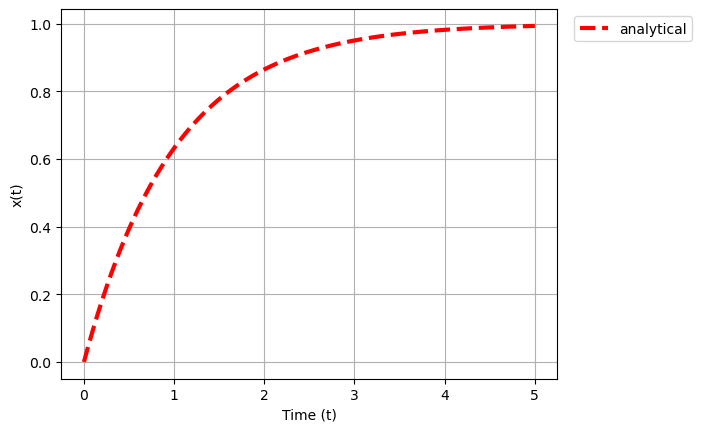

In [15]:
plot()

Fig 1. Analytical Solution of the ODE

The figure visualizes the analytical solution of the differential equation.

It gradually increases and asymptotically approaches x=1 as t->5.

This trend aligns with the formula which describes an exponential growth towards 1.

## Part 1: Python’s ODE solver

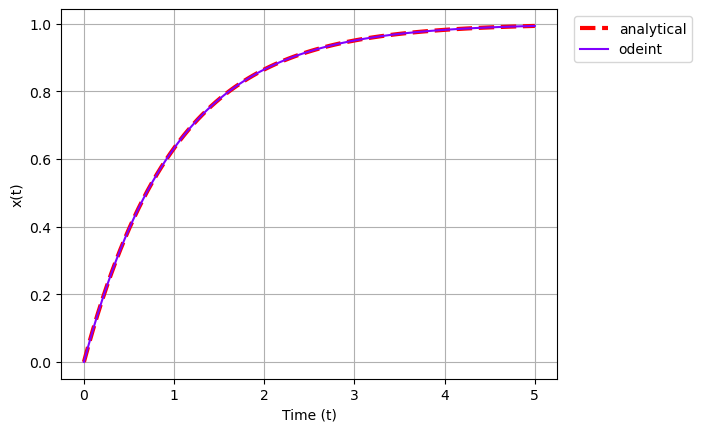

In [16]:
t = np.linspace(0, 5, 100)
x = odeint(model, y0=0, t=t)

plot(methods={"odeint": (t, x)})

Fig 2. The numerical solution (odeint) v.s. the analytical solution for the ODE

The numerical solution (purple solid line) computed using odeint closely matches the analytical solution (red dashed line), confirming the accuracy of the numerical integration.

## Part 2: The forward Euler method

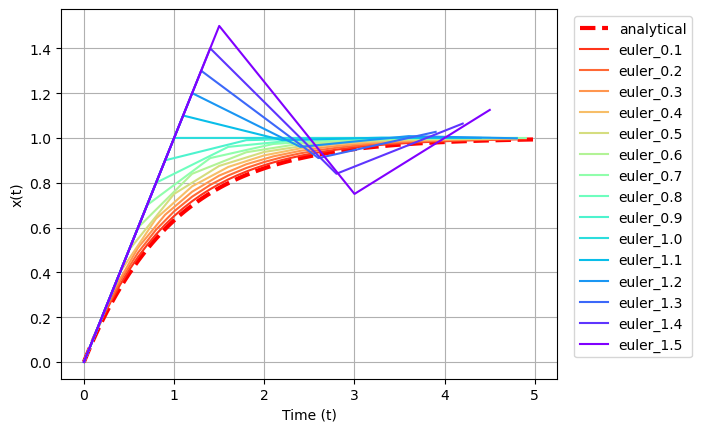

In [ ]:
def test_euler() -> dict[str, tuple[np.array, np.array]]:
    methods = {}
    for dt in np.arange(0.1, 1.6, 0.1):
        tx = my_solver(model, x0=0, tspan=(0, 5), dt=dt, method=euler)
        methods[f"euler_{round(dt, 1)}"] = tx

    return methods


plot(methods=test_euler())

Fig 3. Effect of step size (dt) on the accuracy of the Euler method for the ODE

Each curve represents the numerical solution using the Euler method with a different step size, ranging from dt=0.1 (red) to dt=1.5 (purple).

The analytical solution (red dashed line) serves as a reference.

Larger step sizes lead to divergence and instability, while smaller step sizes improve accuracy.

## Part 3: The RK4 method

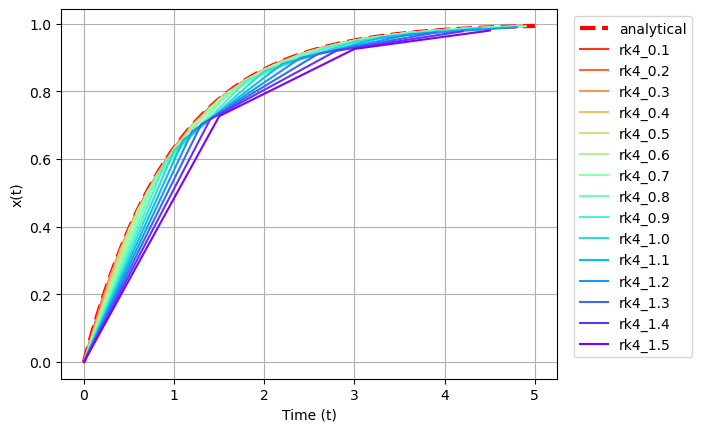

In [ ]:
def rk4_test() -> dict[str, tuple[np.array, np.array]]:
    methods = {}
    for dt in np.arange(0.1, 1.6, 0.1):
        tx = my_solver(model, x0=0, tspan=(0, 5), dt=dt, method=rk4)
        methods[f"rk4_{round(dt, 1)}"] = tx

    return methods


plot(methods=rk4_test())

Fig 4. Effect of step size (dt) on the accuracy of the Runge-Kutta 4th order (RK4) method for the ODE

Each curve represents the numerical solution using RK4 with a different step size, ranging from dt=0.1 (red) to dt=1.5 (purple).

The analytical solution (red dashed line) is also used as a reference.

Compared to the Euler method, RK4 provides significantly better stability and accuracy, even for larger step sizes!

In [22]:
%timeit euler_test()

114 μs ± 2.21 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
%timeit rk4_test()

242 μs ± 3.97 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
